# Time series modelling

In [11]:
import pandas as pd
import numpy as np

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df_airp = pd.read_csv("Airpassengers.csv")

In [36]:
df_airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [37]:
df_airp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [38]:
df_airp["Month"] = pd.to_datetime(df_airp["Month"] , format = "%Y-%m" ) + pd.tseries.offsets.MonthEnd(1)

In [40]:
df_airp['Month'] = df_airp['Month'].dt.strftime('%d-%m-%y')

In [41]:
df_airp.head()

,Month,#Passengers
0,31-01-49,112
1,28-02-49,118
2,31-03-49,132
3,30-04-49,129
4,31-05-49,121


In [44]:
df_airp.set_index(["Month"],drop = True , inplace = True)
# drop = True , this removes the existing index and doesnt add it as a columns to dataframe

In [45]:
df_airp.head()

,#Passengers
Month,
31-01-49,112
28-02-49,118
31-03-49,132
30-04-49,129
31-05-49,121


In [46]:
df_airp.dtypes

#Passengers    int64
dtype: object

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

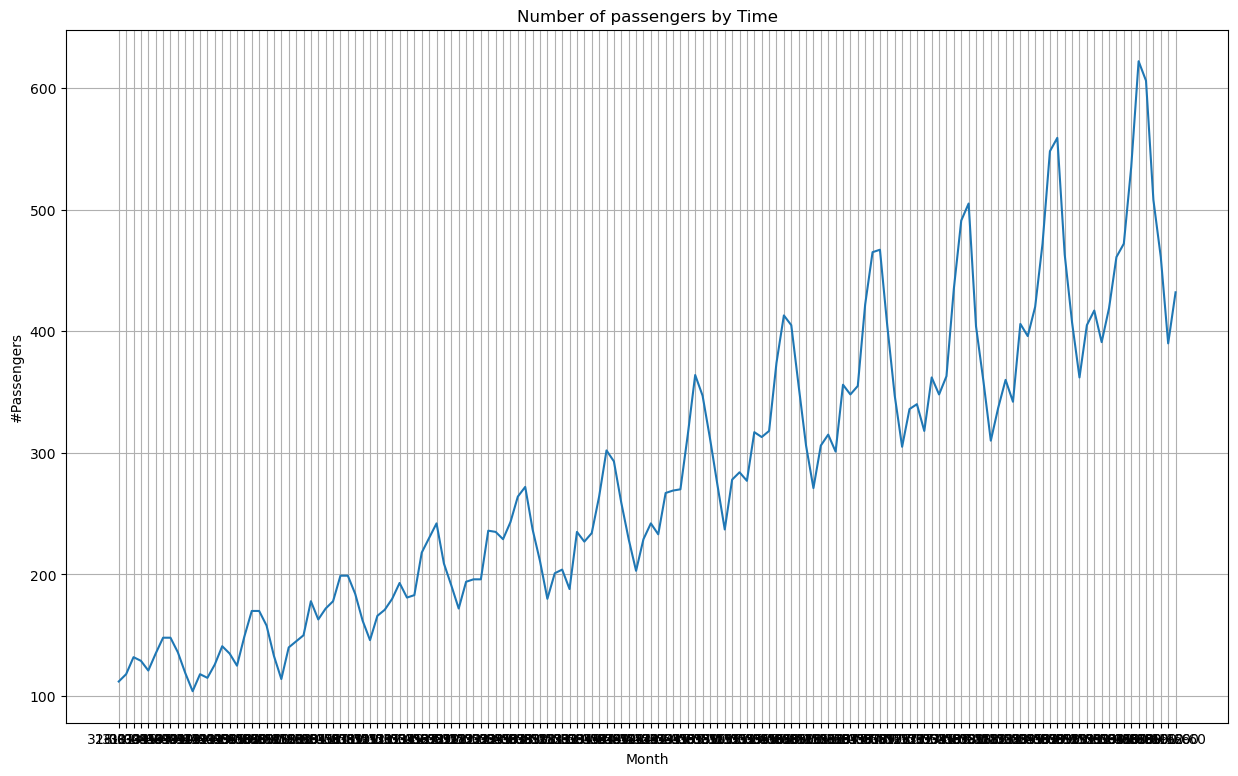

In [48]:
plt.figure(figsize=(15,9))
sns.lineplot(data = df_airp , x = df_airp.index , y = '#Passengers')
plt.grid(True)
plt.title('Number of passengers by Time')
plt.show()

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# time series = trend + seasonnal + residual
# trend -> up or down
# seasonal -> repeating pattern
# residual -> Time series -trend - seasonal

In [ ]:
decomp_airp = seasonal_decompose(x=df_airp["#Passengers"])

In [ ]:
decomp_airp.trend.values

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(decomp_airp.trend)
plt.title("air passengers trend")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(decomp_airp.seasonal)
plt.grid(True)
plt.title("seasonal")
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(decomp_airp.resid)
plt.grid(True)
plt.title("residual")
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(decomp_airp.observed)
plt.grid(True)
plt.title("seasonal")
plt.show()

In [ ]:
# stationarity

In [ ]:
# weak stationary - constant mean , constant variance , constant co - variance

In [54]:
ts_rolling_mean = df_airp['#Passengers'].rolling(12).mean()

In [55]:
ts_rolling_mean[0:20]

Month
31-01-49           NaN
28-02-49           NaN
31-03-49           NaN
30-04-49           NaN
31-05-49           NaN
30-06-49           NaN
31-07-49           NaN
31-08-49           NaN
30-09-49           NaN
31-10-49           NaN
30-11-49           NaN
31-12-49    126.666667
31-01-50    126.916667
28-02-50    127.583333
31-03-50    128.333333
30-04-50    128.833333
31-05-50    129.166667
30-06-50    130.333333
31-07-50    132.166667
31-08-50    134.000000
Name: #Passengers, dtype: float64

In [56]:
ts_rolling_std = df_airp["#Passengers"].rolling(12).std()

In [57]:
ts_rolling_std[0:20]

Month
31-01-49          NaN
28-02-49          NaN
31-03-49          NaN
30-04-49          NaN
31-05-49          NaN
30-06-49          NaN
31-07-49          NaN
31-08-49          NaN
30-09-49          NaN
31-10-49          NaN
30-11-49          NaN
31-12-49    13.720147
31-01-50    13.453342
28-02-50    13.166475
31-03-50    13.686977
30-04-50    13.822467
31-05-50    13.663710
30-06-50    14.760718
31-07-50    18.135016
31-08-50    20.797727
Name: #Passengers, dtype: float64

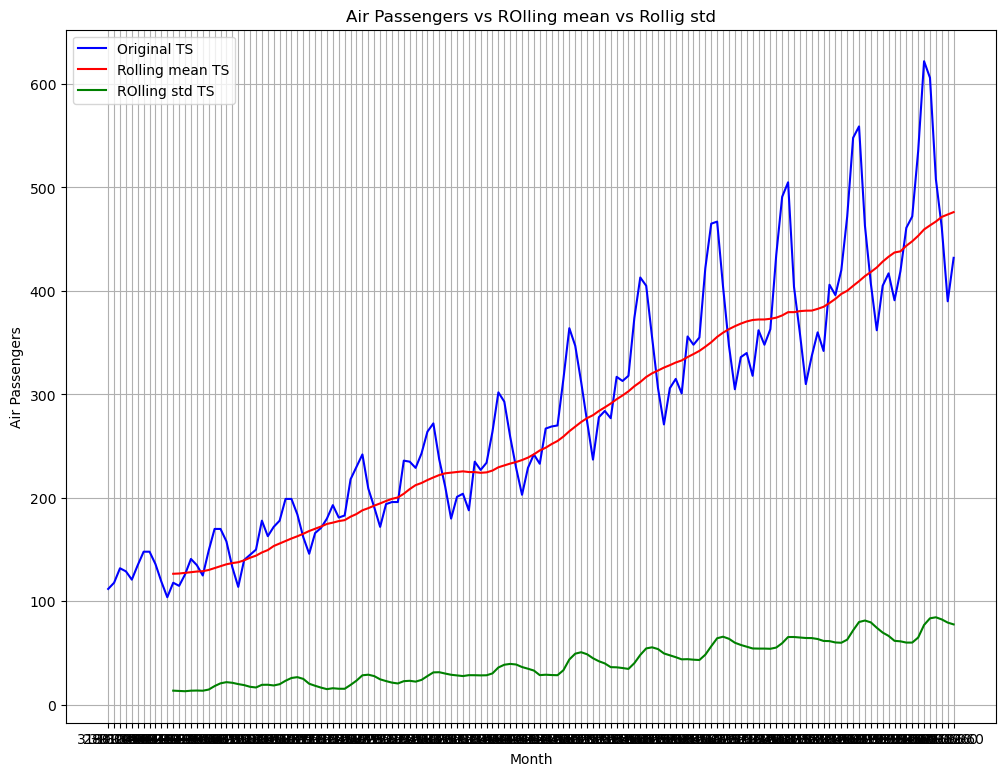

In [58]:
plt.figure(figsize= (12,9))
plt.plot(df_airp["#Passengers"],color ='blue',label = "Original TS")
plt.plot(ts_rolling_mean,color ='red',label = "Rolling mean TS")
plt.plot(ts_rolling_std,color ='green',label = "ROlling std TS")
plt.legend(loc = "best") # loc=best , places the legend on the upper left of graph
plt.grid(True)
plt.title("Air Passengers vs ROlling mean vs Rollig std")
plt.xlabel("Month")
plt.ylabel("Air Passengers")
plt.show()

# dikifuller test

In [ ]:
# null hyopthesis= time series is not stationay
# alternate hypothesis = time series is stationary

In [59]:
from statsmodels.tsa.stattools import adfuller

In [60]:
adf_test = adfuller(df_airp["#Passengers"])

In [61]:
adf_test

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [62]:
adf_test[1]
# the first value is t-statistisc
# second is the p-value
# third is number of observations
# fourth is number of lags

0.9918802434376409

In [63]:
ts_diff1 = df_airp["#Passengers"].diff()

In [64]:
ts_diff1

Month
31-01-49     NaN
28-02-49     6.0
31-03-49    14.0
30-04-49    -3.0
31-05-49    -8.0
            ... 
31-08-60   -16.0
30-09-60   -98.0
31-10-60   -47.0
30-11-60   -71.0
31-12-60    42.0
Name: #Passengers, Length: 144, dtype: float64

In [65]:
adfuller(ts_diff1.dropna())

(-2.8292668241699954,
 0.05421329028382609,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [66]:
ts_diff2 = df_airp["#Passengers"].diff().diff()

In [67]:
ts_diff2

Month
31-01-49      NaN
28-02-49      NaN
31-03-49      8.0
30-04-49    -17.0
31-05-49     -5.0
            ...  
31-08-60   -103.0
30-09-60    -82.0
31-10-60     51.0
30-11-60    -24.0
31-12-60    113.0
Name: #Passengers, Length: 144, dtype: float64

In [68]:
adf_test2 = adfuller(ts_diff2.dropna())

In [69]:
adf_test2

(-16.3842315424685,
 2.7328918500142407e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275608)

In [70]:
np.round(adf_test2[1],2)

0.0

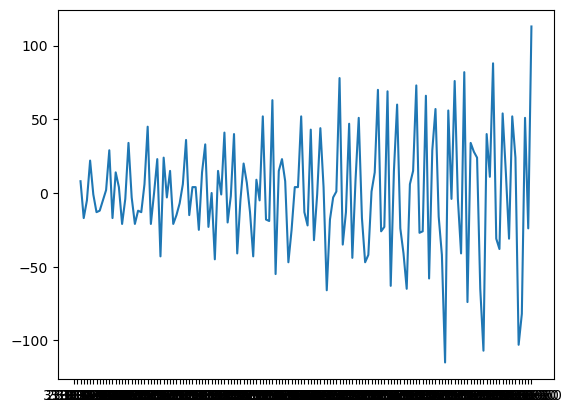

In [71]:
plt.plot(ts_diff2)
plt.show()
# the graph is centered around mean

In [72]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

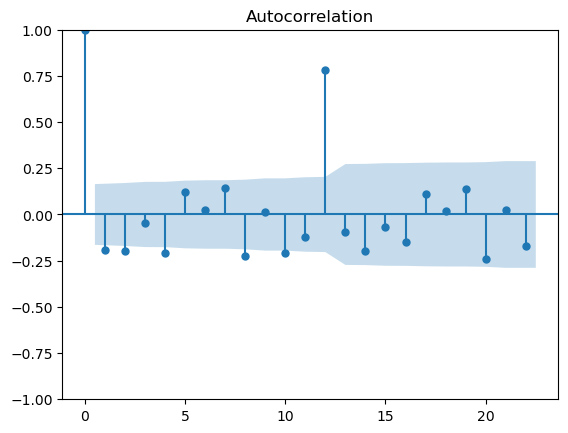

In [73]:
plot_acf(ts_diff2.dropna())
plt.show()

<Figure size 1500x900 with 0 Axes>

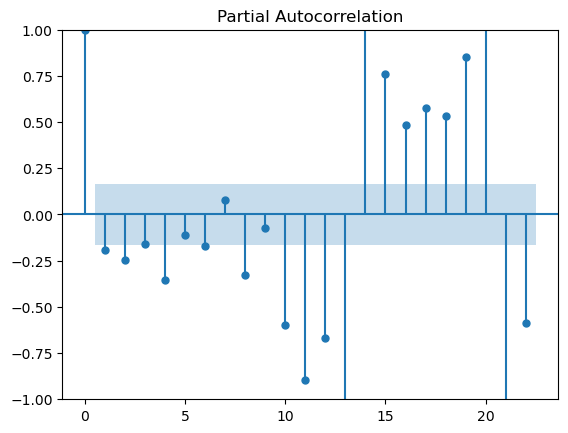

In [74]:
plt.figure(figsize = (15,9))
plot_pacf(ts_diff2.dropna())
plt.show()

In [ ]:
df_train = df_airp[df_airp.index < pd.to_datetime('1960-01-31')]
df_test = df_airp[df_airp.index >= pd.to_datetime('1960-01-31')]

In [ ]:
df_train.tail()

In [ ]:
df_test.head()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [115]:
model = ARIMA(df_train['#Passengers'],order = [1,2,1],freq = 'M')

In [116]:
result = model.fit()

In [117]:
predict = result.forecast(12)
# [0] because we have many other values in the results like the upper confidence interval and lower confidence interval and others , but we are only interested the forecasted values , which is at index 0

In [118]:
predict

1960-01-31    419.481730
1960-02-29    425.467615
1960-03-31    428.922515
1960-04-30    431.623411
1960-05-31    434.099683
1960-06-30    436.509037
1960-07-31    438.898456
1960-08-31    441.281936
1960-09-30    443.663647
1960-10-31    446.044831
1960-11-30    448.425858
1960-12-31    450.806838
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
# error = np.abs(actual - forecast)
# percentage Error = error/actutal
# mean absolute percentage error -> average across all observations

In [104]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_percentage_error as mape

In [ ]:
# in time series mse doesnt mean much , so refer mape
mse(y_pred = predict , y_true = df_test["#Passengers"].values,squared = False)

In [119]:
mape(y_pred = predict , y_true = df_test["#Passengers"].values)

0.11371001782941483

In [ ]:
# accuracay = 1 - mape(11.45) - > i.e 88.65 % accuracy

In [ ]:
# steps
# first we looked  at trend  , seasonality and residual values
# identify stationarity by visual view or augmented dikifuller test
# then use ARIMA model and pass the order [1,2,1]
# make the forecast using ARIMA model
# find mean absolute percentage error  (mape)
# accuracy  =  1 - mape 
# in timeseries mean square cant be used ,  so use use mean absolute error

In [ ]:
# auto arima ( this selccts the best p,q,d values)

In [76]:
from pmdarima.arima import auto_arima

In [106]:
train = df_airp[0:100]
test = df_airp[100:]

In [109]:
asd = auto_arima(train['#Passengers'],frequency = 'M')

In [110]:
zx = asd.fit(train['#Passengers'])

In [111]:
autopredict = zx.predict(44)

In [ ]:
autopredict

In [113]:
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

In [114]:
sqrt(mse(y_pred = autopredict , y_true = test))

122.02363913383506

In [115]:
mape(y_pred = autopredict , y_true = test)

0.2084101997686573